In [2]:
# ========== Basic Utilities ==========
import os
import sys
import random
import warnings
warnings.filterwarnings("ignore")

# ========== Data Handling ==========
import numpy as np
import pandas as pd

# ========== Data Visualization ==========
import matplotlib.pyplot as plt
import seaborn as sns

# Optional aesthetic setup
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# ========== Data Preprocessing ==========
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
    OneHotEncoder
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# ========== Machine Learning Models ==========
# Linear Models
from sklearn.linear_model import LinearRegression, LogisticRegression

# Tree-Based Models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    AdaBoostClassifier,
    AdaBoostRegressor
)

# Support Vector Machines
from sklearn.svm import SVC, SVR

# Neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Clustering
from sklearn.cluster import KMeans

# ========== Model Evaluation ==========
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import json, pickle 

In [3]:
df = pd.read_csv('F:\Courses\Fall 25\Software\Software Lab\Project\FitLab\AI\Dataset\Final_data.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [4]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [5]:
# Show all unique values in the 'Workout_Type' column
print("Unique Workout Types:")
print(df['Workout_Type'].unique())


Unique Workout Types:
['Strength' 'HIIT' 'Cardio' 'Yoga']


In [6]:
df.isnull().sum()


Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [8]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851454,73.898832,1.723094,179.889702,143.704306,62.195813,1.259446,1280.109601,26.101313,2.627486,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


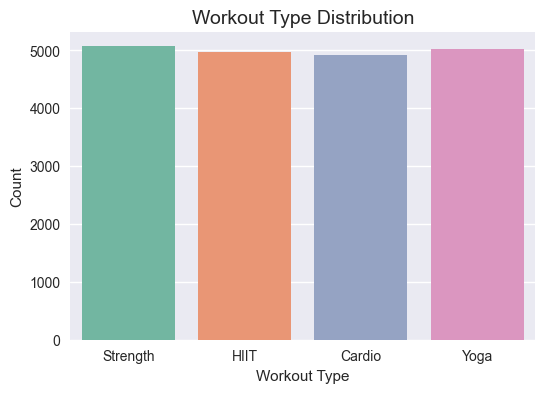

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Workout_Type', data=df, palette='Set2')
plt.title('Workout Type Distribution', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.show()


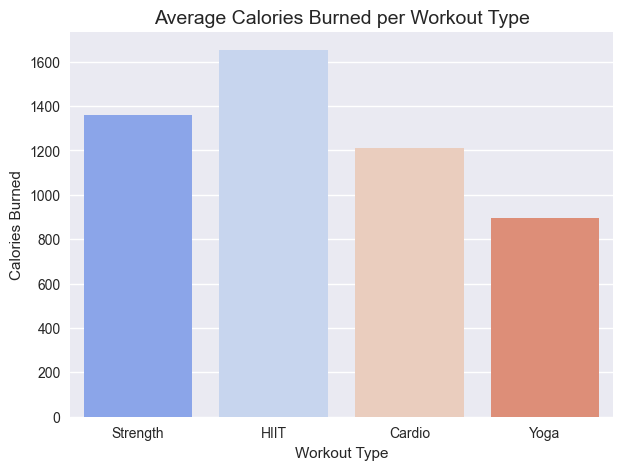

In [10]:
plt.figure(figsize=(7,5))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, palette='coolwarm', ci=None)
plt.title('Average Calories Burned per Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()


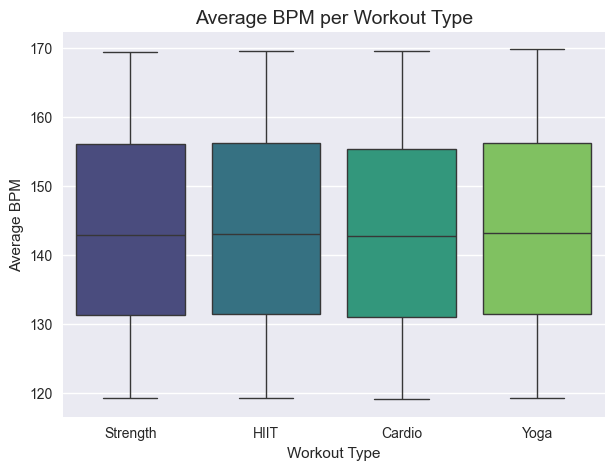

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Workout_Type', y='Avg_BPM', data=df, palette='viridis')
plt.title('Average BPM per Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Average BPM')
plt.show()


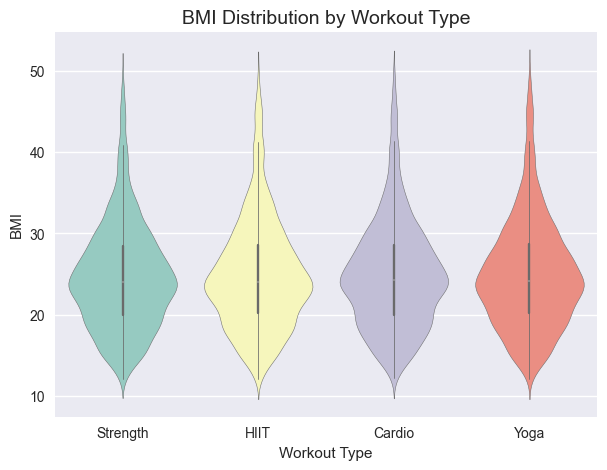

In [12]:
plt.figure(figsize=(7,5))
sns.violinplot(x='Workout_Type', y='BMI', data=df, palette='Set3')
plt.title('BMI Distribution by Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('BMI')
plt.show()


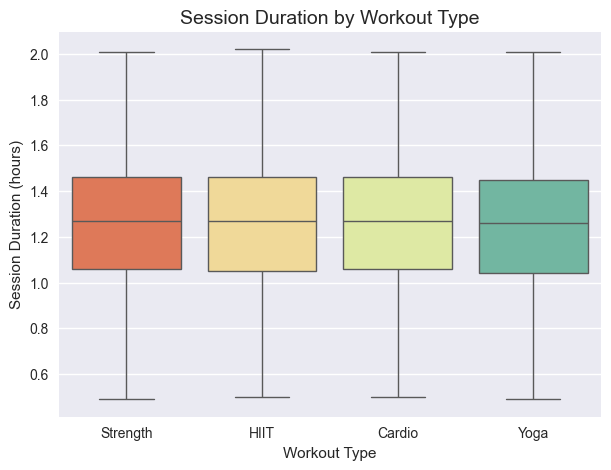

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Workout_Type', y='Session_Duration (hours)', data=df, palette='Spectral')
plt.title('Session Duration by Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Session Duration (hours)')
plt.show()


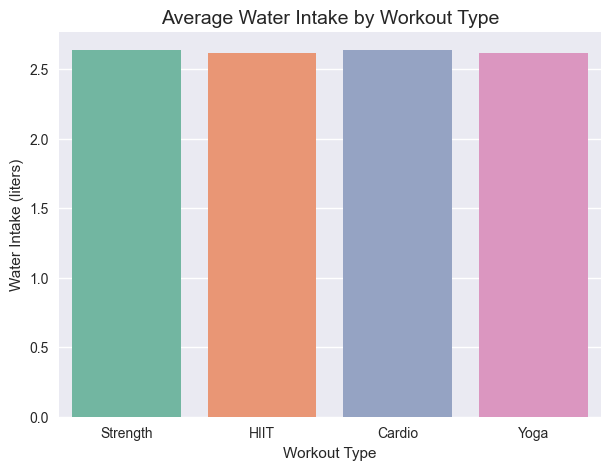

In [14]:
plt.figure(figsize=(7,5))
sns.barplot(x='Workout_Type', y='Water_Intake (liters)', data=df, palette='Set2', ci=None)
plt.title('Average Water Intake by Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Water Intake (liters)')
plt.show()


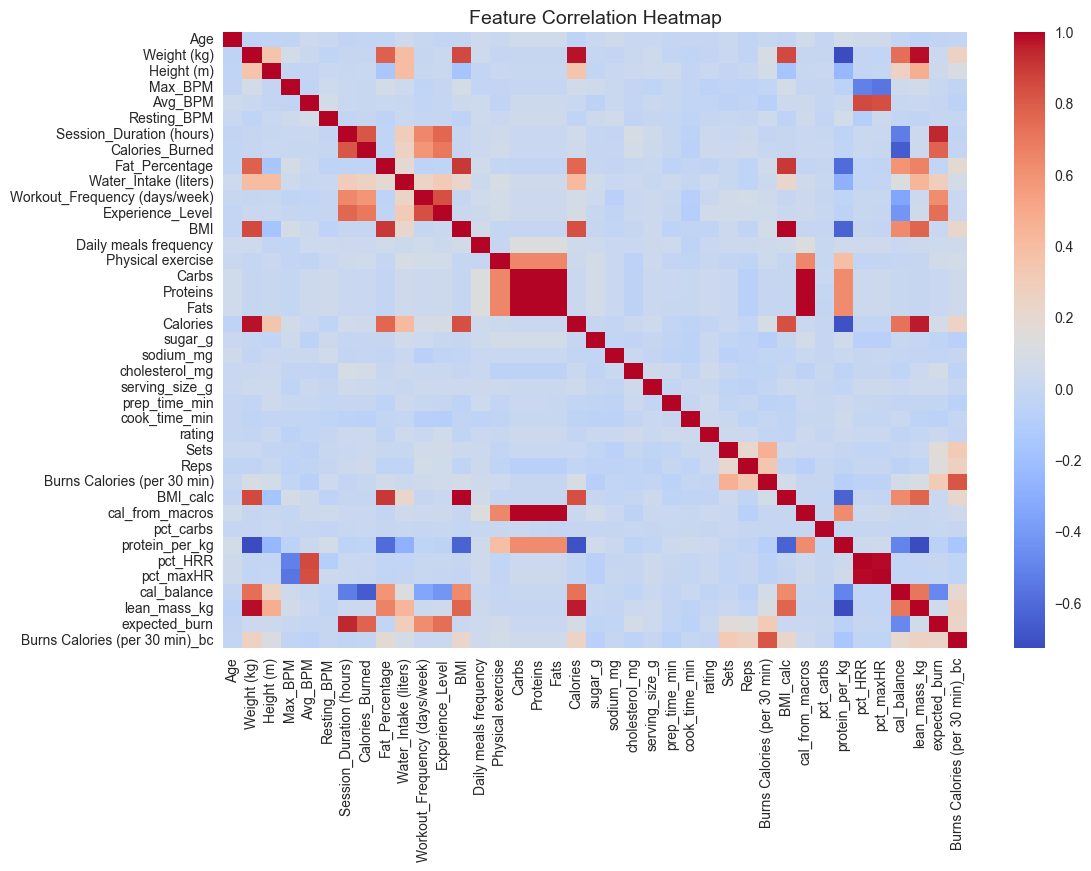

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()


In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)


Categorical Columns:
['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'Burns_Calories_Bin']

Numerical Columns:
['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min', 'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc']


In [17]:
# Display all unique exercise names
exercise_names = df['Name of Exercise'].unique()
print(f"Total unique exercises: {len(exercise_names)}\n")
print(exercise_names)


Total unique exercises: 55

['Decline Push-ups' 'Bear Crawls' 'Dips' 'Mountain Climbers' 'Bicep Curls'
 'Leg Press' 'Thrusters' 'Turkish Get-ups' 'Glute Bridges' 'Step-ups'
 'Plank' 'Pull-ups' 'Lunges' 'Plyo Squats' 'Squats' 'Frog Jumps'
 'Deadlifts' 'Prone Cobras' 'Lat Pulldowns' 'Russian Twists'
 'Shoulder Press' 'Tricep Dips' 'Kettlebell Swings'
 'Resistance Band Pull-Aparts' 'Leg Raises' 'Tricep Extensions'
 'Dead Bugs' 'Scissors Kicks' 'Plyometric Push-ups' 'Push Ups'
 'Bench Press' 'Inverted Rows' 'Seated Rows' 'Calf Raises'
 'Reverse Lunges' 'Deadlift' 'Wall Angels' 'Lateral Raises' 'Face Pulls'
 'Burpees' 'Push-ups' 'Box Jumps' 'Rows' 'Bird Dogs' 'Dragon Flags'
 'Bicycle Crunches' 'Flutter Kicks' 'Bulgarian Split Squats' 'Superman'
 'Incline Push-ups' 'Jumping Jacks' 'Renegade Rows' 'Windshield Wipers'
 'Zottman Curls' 'Pistol Squats']


In [19]:
# Loop through all columns and print unique values
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n🔹 Column: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals[:10]}")  # show only first 10 values



🔹 Column: Age
Unique values (3950): [34.91 23.37 33.2  38.69 45.09 53.19 23.17 55.92 24.11 39.19]

🔹 Column: Gender
Unique values (2): ['Male' 'Female']

🔹 Column: Weight (kg)
Unique values (7042): [ 65.27  56.41  58.98  93.78  52.42 105.05  58.41  84.07  88.58  50.32]

🔹 Column: Height (m)
Unique values (53): [1.62 1.55 1.67 1.7  1.88 1.84 1.78 1.63 1.79 1.6 ]

🔹 Column: Max_BPM
Unique values (3808): [188.58 179.43 175.04 191.21 193.58 176.52 184.75 183.87 176.78 166.88]

🔹 Column: Avg_BPM
Unique values (4801): [157.65 131.75 123.95 155.1  152.88 130.6  140.9  141.12 154.07 128.04]

🔹 Column: Resting_BPM
Unique values (1939): [69.05 73.18 54.96 50.07 70.84 61.84 58.01 51.79 65.19 49.91]

🔹 Column: Session_Duration (hours)
Unique values (154): [1.   1.37 0.91 1.1  1.08 0.69 1.67 1.01 1.76 1.17]

🔹 Column: Calories_Burned
Unique values (4587): [1080.9  1809.91  802.26 1450.79 1166.4   453.33 1953.9   727.81 2062.37
 1157.25]

🔹 Column: Workout_Type
Unique values (4): ['Strength' 'HIIT'

In [20]:
# Count unique values per column
unique_counts = df.nunique().sort_values()

# Display top 5 columns with least variety
print("🔹 Top 5 columns with the least unique values:\n")
print(unique_counts.head(5))


🔹 Top 5 columns with the least unique values:

meal_name             1
Gender                2
Difficulty Level      3
meal_type             4
Burns_Calories_Bin    4
dtype: int64


In [21]:
df = df.drop('meal_name', axis=1)
'meal_name' in df.columns

False